# DDS DINO-X: Detection on a local image

This notebook uses the `dds-cloudapi-sdk` to call the DINO-X detection API on a local image at `./data/copan_dem_01m_raster.jpg`.

It is organized into cells for imports, configuration, task creation, execution, result viewing, and visualization.

Notes:
- Set `DDS_API_TOKEN` via a `.env` file or environment. The notebook loads `.env` and reads `os.environ["DDS_API_TOKEN"]`.
- Get DDS_API_TOKEN for free here: https://cloud.deepdataspace.com/apply-token

## Imports

In [36]:
import os
import json
from dotenv import load_dotenv
from dds_cloudapi_sdk import Config, Client
from dds_cloudapi_sdk.tasks.v2_task import V2Task, create_task_with_local_image_auto_resize
from dds_cloudapi_sdk.visualization_util import visualize_result
from IPython.display import Image

## Configure client (API token)

In [37]:
load_dotenv()
TOKEN = os.environ["DDS_API_TOKEN"]
config = Config(TOKEN)
client = Client(config)

## Set image path and DINO-X parameters

In [38]:
image_path = "./data/copan_dem_01m_raster.jpg"
api_path = "/v2/task/dinox/detection"

prompt = {"type": "universal", "universal": 1}

api_body = {
    "model": "DINO-X-1.0",
    "prompt": prompt,
    "targets": ["bbox", "mask"],
    "bbox_threshold": 0.25,
    "iou_threshold": 0.8,
    "mask_format": "coco_rle",
}

## Create task with local image (auto-resized by SDK)

In [39]:
task = create_task_with_local_image_auto_resize(
    api_path=api_path,
    api_body_without_image=api_body,
    image_path=image_path,
)

## Run task and wait for result

In [40]:
task.set_request_timeout(10)  # optional timeout in seconds
client.run_task(task)
print("Task completed.")

Task completed.


## Inspect raw result JSON

In [41]:
print(json.dumps(task.result, indent=2, ensure_ascii=False))

os.makedirs("outputs", exist_ok=True)
with open("outputs/dinox_result.json", "w", encoding="utf-8") as f:
    json.dump(task.result, f, indent=2, ensure_ascii=False)
print("Saved: outputs/dinox_result.json")

{
  "objects": [
    {
      "bbox": [
        7,
        3,
        2004,
        1953
      ],
      "category": "map",
      "mask": {
        "counts": "Pd?c0Ul1b0gUNnNW5NhJ;XY1NPiNMeLX1:Mi0QOhNe0`1IcNB@=hZ1@UiNMeLX1:Mi0QOhNe0`1IcNB@=WZ15]iNEbLT184g0P1If0c8bLef0m0XSOL]Lf3Q1b3S1nGb1n0aLIc0J`13Sh0[OXXOn0P1_4[Mh2LmG54W2[2QMmNW10]h0bNhXOn0P1_4[Mh2LmG54W2[2QMmNW10\\h0dNjXOh0R1c4WMi2HTH5MU2S5YMlL=Mhe0UN^\\O;l0k4SMk2FUH9JQ2b;dMWDb0j0o1WO[12c6<WHIb0W5QMm2FUH7IQ2l>POlAn1EQ7H`HIb0W5QMm2FUH7IQ2l>POlAn1EP7LTH^O\\M:_3X5QMm2FTH8J:H>\\b0fNl^O1fN0Y2S:\\NZHWOdM309]3[5SMk2CXH:I5K?ng0d0kWOR5h0lITOe09hN3d2K`Mb51R44iF6N<\\j0EmTOW1T1j0MRNTOe09hN3d2K`Mb51R44iF6N<\\j0EmTOW1T1j02kMWOf02mN8]2HeMl?4d@3O>Zj0_ObUOk0R1n0^OWN^Od0HVO:Z2FgMm?2nAd0[j0KaUOW1:WNbM=>A<k0VO?>hNn?1mAf0Zm0o0_SOXN^M0d0>QOj0;hN]b0i0X==mROjN^M0d0>QOj0;hN]b0i0X==UUOmNoJQ1[c0Dc<<gUOTOVJ4gc09]<>gUOQO]J0ec0<Y<c0eUOQO]J0ec0<Y<c0fJWO`5g0bJUO`5k0`JWO^5i0bJWO^5j0aJWO_5h0bJXO]5h0fJUOZ5k0fJUOZ5k0`k000000000000SlNQOd;o0[DVOa;j0_DVOa;j0^DXOa;h0`DWO`;i0

## Visualize results

Saved visualizations to: outputs/dinox


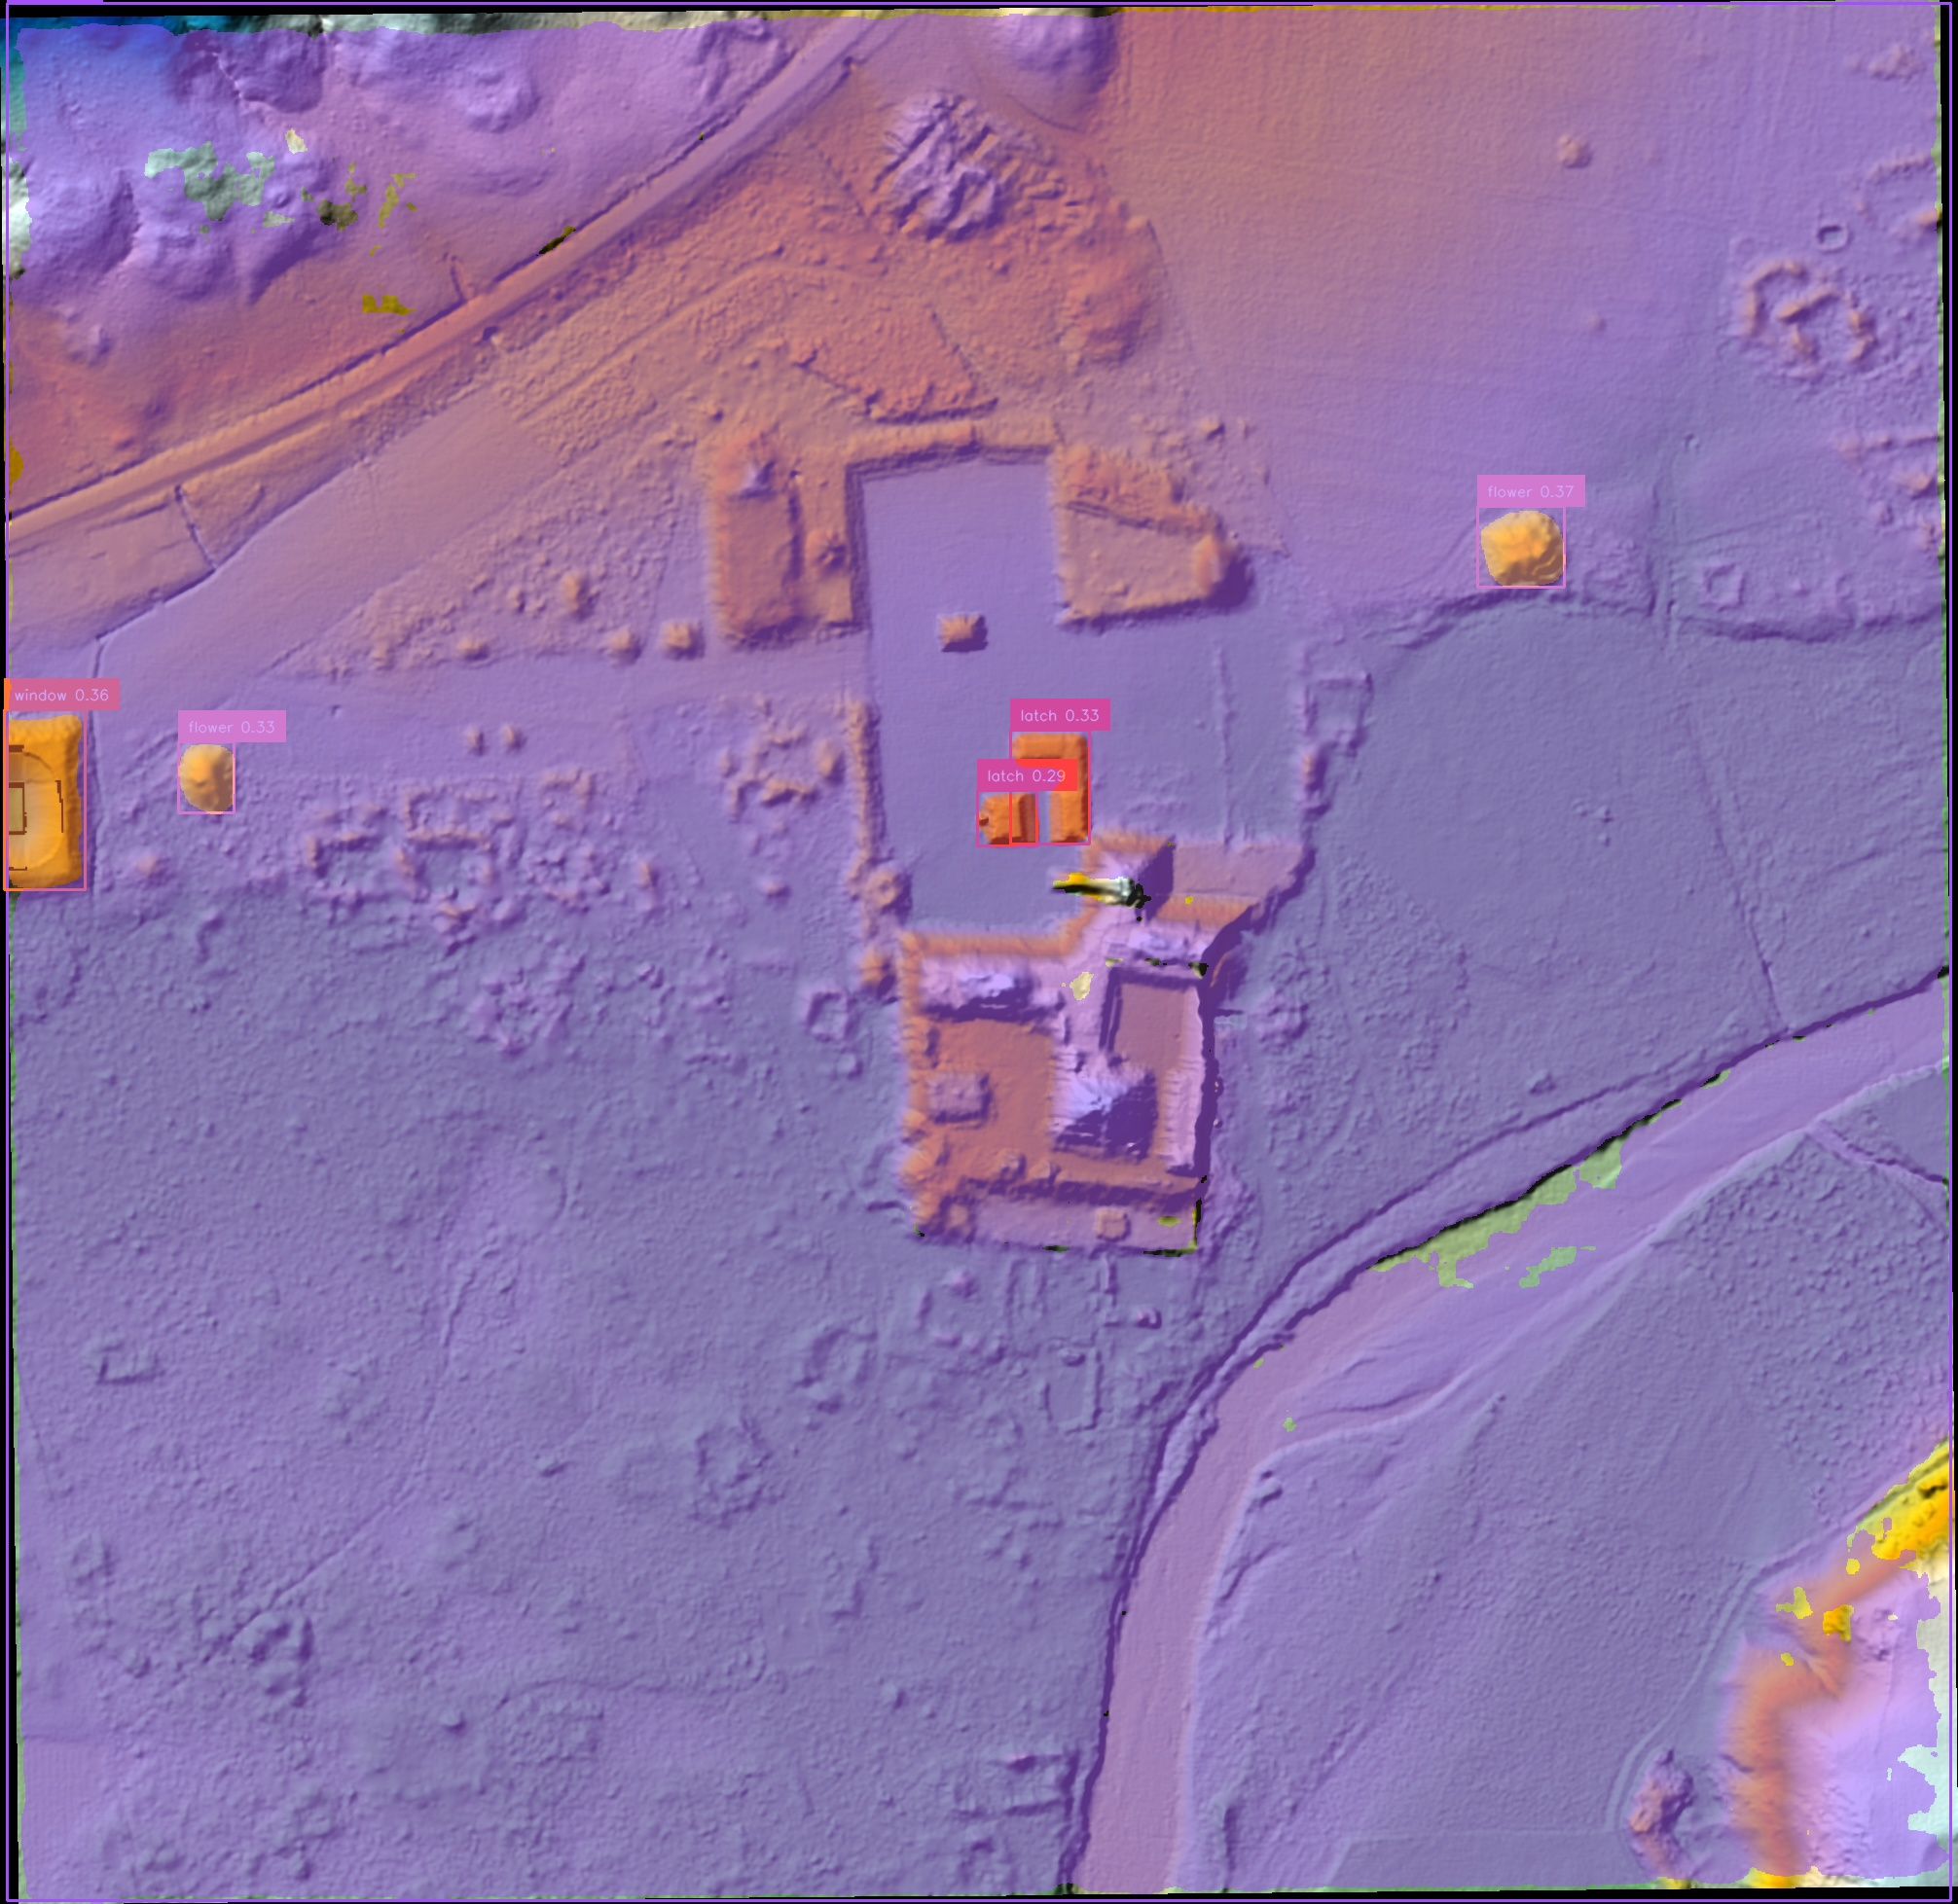

In [44]:
out_dir = "outputs/dinox"
os.makedirs(out_dir, exist_ok=True)
visualize_result(image_path=image_path, result=task.result, output_dir=out_dir)
print(f"Saved visualizations to: {out_dir}")
display(Image("outputs/dinox/annotated_image.jpg"))

### Notes
- For the DINO-X region captioning API (`/v2/task/dinox/region_vl`), use detected bounding boxes as regions and request targets like `caption`.
- If you consistently call on the same image, you can consider using `session_id` to avoid resending the image payload.
- DEM/remote-sensing/monochrome content may not yield meaningful detections with general vision models; tweaking prompts or thresholds can sometimes help.